# Predicting Irish house energy ratings using supervised machine learning methods 

## AIB Datahack 2016

The exercise in part 1 of this series, where can be viewed [here](https://nbviewer.jupyter.org/github/mcsweena/AIB-Datahack-2016/blob/master/Part1-Initial-Data-Exploration.ipynb), was very useful. The analysis highlighted some very important insights into the variables I believed to be most important. 

But what about the variables I didn't feel were as important, what if secretly, they're the lynch pin to this whole thing. Lets use a few different techniques to see if we can uncover any of these hidden important variables.

First, to bring as much data into focus as possible, lets do some light processing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Data Import
train = pd.read_csv("large_data/training.txt", sep='\t', encoding='ISO-8859-1', header=0, low_memory=False, index_col=0)
test = pd.read_csv("large_data/testing.txt", sep='\t', encoding='ISO-8859-1', header=0, low_memory=False, index_col=0)

train.head(3)

,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,AvgFloorU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
BuildingID,,,,,,,,,,,,,,,,,,,,,
190835,Co. Wexford,Mid-terrace house,Y1890.0,Existing,F,418.42,52.04 sq. m,2.10,2.30,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2335.6809
523113,Co. Clare,Detached house,Y1901.0,Existing,G,520.35,147.44 sq. m,2.01,0.75,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7144.838,4470.0759
271393,Co. Kerry,Detached house,Y1968.0,Existing,D2,281.33,104.84 sq. m,0.38,0.13,0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127.347,5837.4729


In [3]:
# Dataframe shapes
print("Train: ", train.shape)
print("Test: ", test.shape)

Train:  (464514, 140)


In [4]:
# Lets check the columns
train.columns

Index(['County', 'Type', 'Year', 'RatingType', 'EnergyRatingCat',
       'EnergyRatingCont', 'GroundFloorArea', 'AvgWallU', 'AvgRoofU',
       'AvgFloorU',
       ...
       'EffSecondHeatGenPlant', 'PercSecondHeat', 'FuelTypeThirdBoiler',
       'EffThirdHeatGenPlant', 'PercThirdHeat', 'HeatingSystemSolarSpace',
       'TotPrimaryEnergyFac', 'TotCO2Emissions', 'PrimaryEnergySecondarySpace',
       'EnergyMainWater'],
      dtype='object', length=140)

Ok, first off, lets look at the variables with null values in them

In [5]:
null_df = df.isnull().sum()
null_df[null_df > 0].count()

137

137 of the 140 variables in the whole dataframe have null values. This is useful information. But is missing one or two values really that detrimental to our overall analysis? Probably not. Lets look at the overall percentage of missing values in each column and remove any columns missing over 15% of there total values.

In [6]:
len(df)

464514

In [7]:
null_df = null_df.reset_index()
null_df.columns = ['index', 'count']
null_df['percentage'] = null_df['count'].apply(lambda x: (x/len(df))*100)
null_df.set_index('index', inplace=True)
null_df_15 = null_df[null_df['percentage'] > 15]

In [8]:
len(null_df_15)

27

In [9]:
null_df_15.index

Index(['AreaAperture', 'ZeroLossCollEff', 'CollHeatLoss', 'SolarRadiation',
       'Overshading', 'DedicatedSolarVol', 'SolarPumpElect', 'SolarHeatFrac',
       'LargestRoofType', 'ProdFirstEnerComment', 'ConsFirstEnerComment',
       'ProdSecondEnerComment', 'ConsSecondEnerComment',
       'ProdThirdEnerComment', 'ConsThirdEnerComment', 'FuelTypeFirstBoiler',
       'EffFirstHeatGenPlant', 'PercFirstHeat', 'FuelTypeSecondBoiler',
       'EffSecondHeatGenPlant', 'PercSecondHeat', 'FuelTypeThirdBoiler',
       'EffThirdHeatGenPlant', 'PercThirdHeat', 'HeatingSystemSolarSpace',
       'TotPrimaryEnergyFac', 'TotCO2Emissions'],
      dtype='object', name='index')

So 27 of the 140 variables have over 15% of their values missing, and most of these were missing above 90%. Taking a quick look at the column names, none look considerably important, so lets drop them.

In [10]:
df = df.drop(null_df_15.index, axis='columns')
df.shape

(464514, 113)

With these removed, lets look at whats left.

In [11]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('float64'): Index(['EnergyRatingCont', 'AvgWallU', 'AvgRoofU', 'AvgFloorU', 'AvgWindowU',
        'AvgDoorU', 'ExposedWallArea', 'ExposedRoofArea', 'TotFloorArea',
        'TotWindowArea', 'TotDoorArea', 'NStoreys', 'MainSHEfficiency',
        'BuildingReg', 'MainSHAdj', 'SecSHFrac', 'SecSHEfficiency',
        'MainWHEfficiency', 'MainWHAdj', 'SecSHFuel', 'SecWHFuel', 'NChimneys',
        'NOpenFlues', 'NFansVents', 'PercDraughtStripped', 'NShelteredSides',
        'PermTestResult', 'TempAdj', 'ControlCat', 'ResponseCat', 'NCHPumps',
        'NGasFans', 'DistLoss', 'VolWaterStorage', 'TempFac', 'TempFacMult',
        'HWInsulationThickness', 'LightingEnergy', 'PumpsAndFansEnergy',
        'MainWaterEnergy', 'PrimaryLightingEnergy', 'PrimaryPumpsFansEnergy',
        'PrimaryMainWaterEnergy', 'PrimaryMainSpaceEnergy', 'LightingCO2',
        'PumpsAndFansCO2', 'MainWaterCO2', 'MainSpaceCO2', 'AreaGroundFloor',
        'HeightGroundFloor', 'AreaFirstFloor', 'HeightFirstFloor',
     

In [12]:
dtype_dict = {k.name: v for k, v in g.items()}
dtype_dict.keys()

dict_keys(['float64', 'object'])

In [13]:
print('Number of numerical columns: ', len(dtype_dict['float64']))
print('Number of object columns: ', len(dtype_dict['object']))

Number of numerical columns:  64
Number of object columns:  49


Great, 64 of the 113 columns are already numerical based. We can leave these alone for now. Lets dig into the object variables and see if a little processing can transform to the required numerical data

In [14]:
df[dtype_dict['object']].head()

,County,Type,Year,RatingType,EnergyRatingCat,GroundFloorArea,MainSHFuel,MainWHFuel,SharedMPRN,DLobby,...,FirstEnerType,FirstEnerTypeDescr,ProdFirstEnerDelivered,ProdFirstEnerConvFac,SecondEnerTypeDescr,ProdSecondEnerDelivered,ProdSecondEnerConvFac,ThirdEnerTypeDescr,ProdThirdEnerDelivered,ProdThirdEnerConvFac
BuildingID,,,,,,,,,,,,,,,,,,,,,
190835,Co. Wexford,Mid-terrace house,Y1890.0,Existing,F,52.04 sq. m,Heating Oil,Heating Oil,NO,NO,...,1,Renewable Thermal,0,0,Renewable Thermal,0,0,Renewable Thermal,0,0
523113,Co. Clare,Detached house,Y1901.0,Existing,G,147.44 sq. m,Heating Oil,Heating Oil,NO,NO,...,1,Renewable Thermal,0,0,Renewable Thermal,0,0,Renewable Thermal,0,0
271393,Co. Kerry,Detached house,Y1968.0,Existing,D2,104.84 sq. m,Heating Oil,Heating Oil,NO,NO,...,1,Renewable Thermal,0,0,Renewable Thermal,0,0,Renewable Thermal,0,0
585961,Co. Cork,Semi-detached house,Y2002.0,Existing,C2,95.31 sq. m,Mains Gas,Mains Gas,NO,NO,...,1,Renewable Thermal,0,0,Renewable Thermal,0,0,Renewable Thermal,0,0
624083,Co. Laois,Detached house,Y2002.0,Existing,B3,283.87 sq. m,Mains Gas,Mains Gas,NO,NO,...,1,Renewable Thermal,0,0,Renewable Thermal,0,0,Renewable Thermal,0,0


Ok this processing might take some time, but it'll be worth it for our deeper analysis.

### County

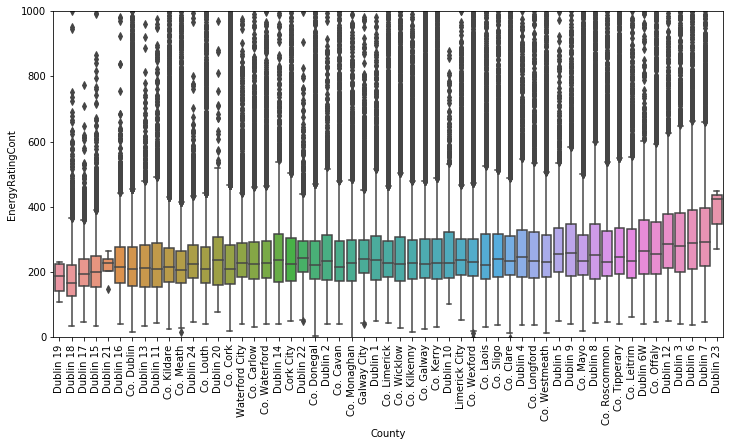

In [15]:
correct_sort = df.groupby(['County']).mean().to_dict()['EnergyRatingCont']
correct_sort = sorted(correct_sort, key=correct_sort.get)

# County
var = 'County'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df, order=correct_sort)
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.axis(ymin=0, ymax=1000);

This graph shows very little evidence that county will have any significant bearing on predicting energy ratings, so lets drop it.

In [16]:
df.drop('County', axis='columns', inplace=True)

### Type

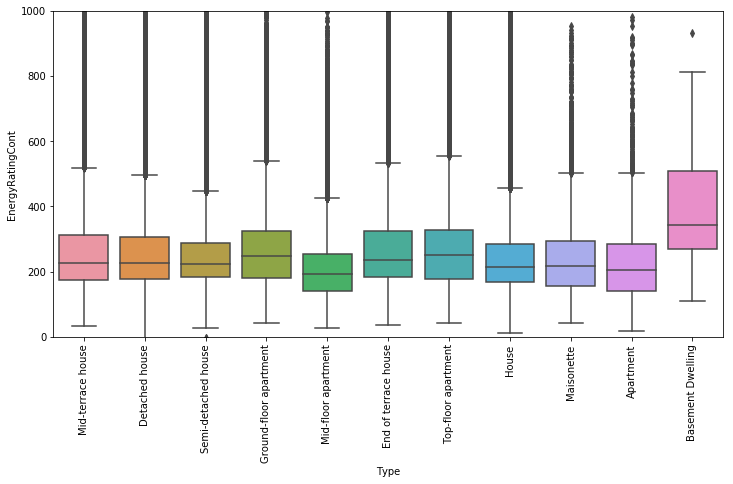

In [17]:
correct_sort = df.groupby(['Type']).mean().to_dict()['EnergyRatingCont']
correct_sort = sorted(correct_sort, key=correct_sort.get)

# Type
var = 'Type'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df)
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.axis(ymin=0, ymax=1000);

Again, this seems like it has very little predictive value, however I thought it would :/ As I dropped county, I feel I'm also obliged to drop type.

In [18]:
df.drop('Type', axis='columns', inplace=True)

### Year 

As we saw in our earlier analysis, Year does seem to have some predictive value, so lets remove the Y in front of each year and keep it in the dataframe.

In [19]:
df['Year'] = df['Year'].map(lambda x: x[1:])

### RatingType

In [20]:
df['RatingType'].unique()

array(['Existing       ', 'Final          ', 'Provisional    ', nan], dtype=object)

In [21]:
df['RatingType'].value_counts()

Existing           428955
Final               28939
Provisional          6608
Name: RatingType, dtype: int64

Straight away looking at these numbers this doesn't look like it'll have any predive power. Lets graph it just to be sure.

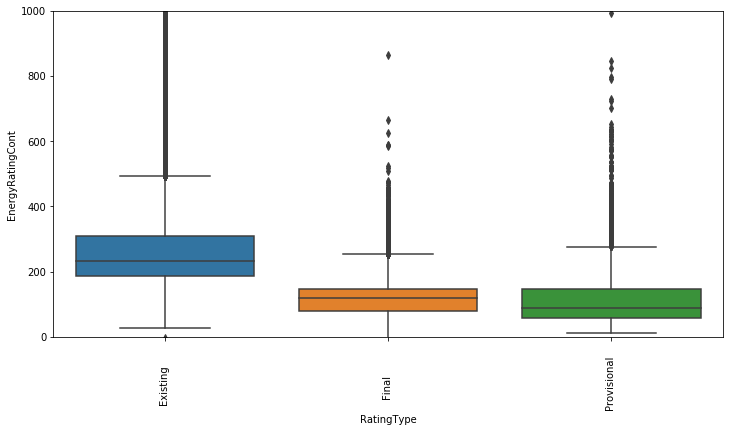

In [22]:
var = 'RatingType'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df)
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.axis(ymin=0, ymax=1000);

The low amount of values in Final and Provisional makes me believe these numbers could be easily skewed. I think dropping these makes sense.

In [23]:
df.drop('RatingType', axis='columns', inplace=True)

### GroundFloorArea
Similar to Year, our analysis earlier shows that this has some useful predictive value. Lets process it and keep it.

In [24]:
df['GroundFloorArea'] = df['GroundFloorArea'].apply(lambda x: float(x[:-5]))

### MainSHFuel

In [25]:
df['MainSHFuel'].fillna('Other', inplace=True)
df['MainSHFuel'] = df['MainSHFuel'].apply(lambda x: x.strip())
df['MainSHFuel'].unique()

array(['Heating Oil', 'Mains Gas', 'Solid Multi-Fuel', 'Electricity',
       'Bulk LPG (propane or butane)', 'Bottled LPG', 'Sod Peat',
       'Wood Pellets (bulk supply for', 'Manufactured Smokeless Fuel',
       'Other', 'House Coal', 'Wood Logs',
       'Wood Pellets (in bags for seco', 'Peat Briquettes',
       'Electricity - Standard Domesti', 'Anthracite',
       'Electricity - Off-peak Night-R', 'Wood Chips',
       'Electricity - On-peak Night-Ra', 'Biodiesel from renewable sourc'], dtype=object)

In [26]:
df['MainSHFuel'].value_counts()

Heating Oil                       179258
Mains Gas                         178597
Electricity                        67796
Solid Multi-Fuel                   17937
Bulk LPG (propane or butane)        6701
Other                               5658
Manufactured Smokeless Fuel         3075
House Coal                          2437
Wood Pellets (bulk supply for        824
Sod Peat                             792
Bottled LPG                          602
Wood Logs                            427
Peat Briquettes                      188
Wood Pellets (in bags for seco        74
Anthracite                            43
Electricity - Off-peak Night-R        39
Electricity - Standard Domesti        34
Wood Chips                            29
Electricity - On-peak Night-Ra         2
Biodiesel from renewable sourc         1
Name: MainSHFuel, dtype: int64

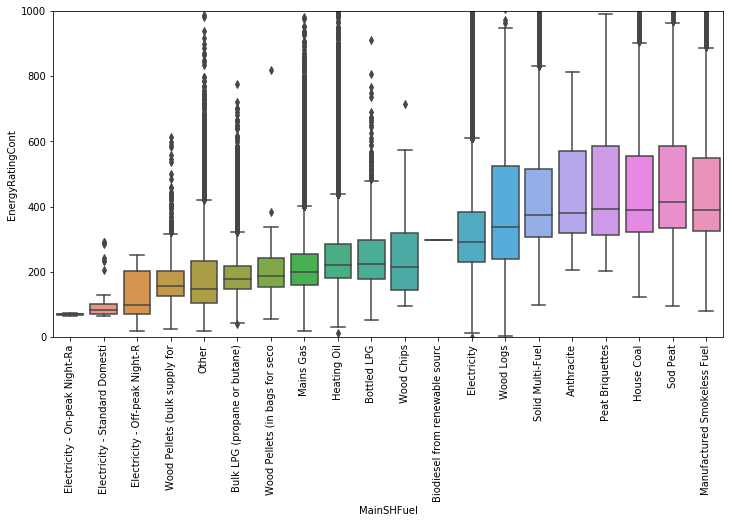

In [27]:
MainSHFuel_sort = df.groupby(['MainSHFuel']).mean().to_dict()['EnergyRatingCont']
MainSHFuel_sort = sorted(MainSHFuel_sort, key=MainSHFuel_sort.get)

var = 'MainSHFuel'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df, order=MainSHFuel_sort)
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.axis(ymin=0, ymax=1000);

This looks useful. Some fuel sources definitely seem to have a negative impact on the overall rating. A number of the option however appear pretty irregulary. To reduce the size of the list, I'm going to group the lower represented into their most relevant categories.

In [28]:
elec = ['Electricity - On-peak Night-Ra', 'Electricity - Standard Domesti', 
       'Electricity - Off-peak Night-R']
df['MainSHFuel'].replace(elec, 'Electricity', inplace=True)

wood = ['Wood Pellets (bulk supply for', 'Wood Pellets (in bags for seco', 'Wood Chips']
df['MainSHFuel'].replace(wood, 'Wood Pellets', inplace=True)

In [29]:
lpg = ['Bulk LPG (propane or butane)', 'Bottled LPG']
df['MainSHFuel'].replace(lpg, 'LPG', inplace=True)

other = ['Biodiesel from renewable sourc', 'Anthracite']
df['MainSHFuel'].replace(other, 'Other', inplace=True)

In [30]:
df['MainSHFuel'].value_counts()

Heating Oil                    179258
Mains Gas                      178597
Electricity                     67871
Solid Multi-Fuel                17937
LPG                              7303
Other                            5702
Manufactured Smokeless Fuel      3075
House Coal                       2437
Wood Pellets                      927
Sod Peat                          792
Wood Logs                         427
Peat Briquettes                   188
Name: MainSHFuel, dtype: int64

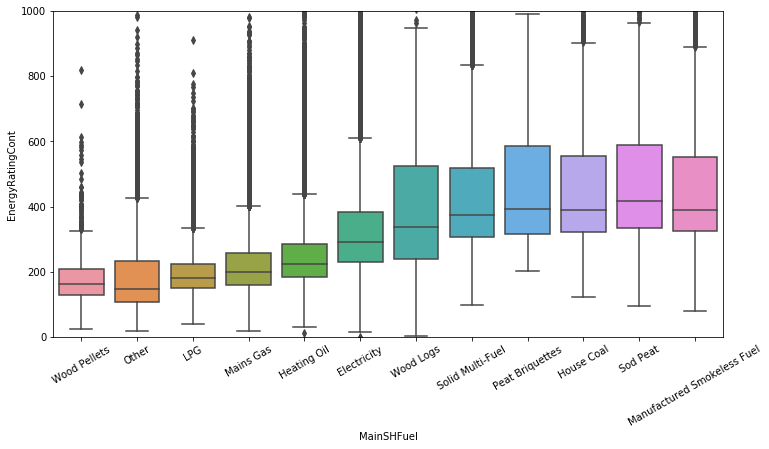

In [31]:
new_MainSHFuel_sort = df.groupby(['MainSHFuel']).mean().to_dict()['EnergyRatingCont']
new_MainSHFuel_sort = sorted(new_MainSHFuel_sort, key=new_MainSHFuel_sort.get)

var = 'MainSHFuel'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df, order=new_MainSHFuel_sort)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1000);

Ok this looks, and feels, a lot better. And finally, lets change this from categorical to numerical.

In [32]:
df['MainSHFuel'] = df['MainSHFuel'].astype('category').cat.codes

In [33]:
df['MainSHFuel'].head()

BuildingID
190835    1
523113    1
271393    1
585961    4
624083    4
Name: MainSHFuel, dtype: int8

### MainWHFuel

In [34]:
df['MainWHFuel'].fillna('Other', inplace=True)
df['MainWHFuel'] = df['MainWHFuel'].apply(lambda x: x.strip())
df['MainWHFuel'].unique()

array(['Heating Oil', 'Mains Gas', 'Solid Multi-Fuel', 'Electricity',
       'Bulk LPG (propane or butane)', 'Bottled LPG',
       'Wood Pellets (bulk supply for', 'Wood Logs',
       'Manufactured Smokeless Fuel', 'Other', 'House Coal', 'Sod Peat',
       'Wood Pellets (in bags for seco', 'Anthracite', 'Peat Briquettes',
       'Electricity - Standard Domesti', 'Electricity - Off-peak Night-R',
       'Wood Chips', 'Electricity - On-peak Night-Ra',
       'Biodiesel from renewable sourc', 'Bioethanol from renewable sour'], dtype=object)

In [35]:
df['MainWHFuel'].value_counts()

Heating Oil                       177903
Mains Gas                         177485
Electricity                        71337
Solid Multi-Fuel                   17231
Bulk LPG (propane or butane)        6673
Other                               5658
Manufactured Smokeless Fuel         2805
House Coal                          2310
Sod Peat                             820
Wood Pellets (bulk supply for        772
Bottled LPG                          653
Wood Logs                            380
Peat Briquettes                      193
Wood Pellets (in bags for seco       118
Anthracite                            53
Electricity - Standard Domesti        45
Wood Chips                            42
Electricity - Off-peak Night-R        30
Biodiesel from renewable sourc         3
Bioethanol from renewable sour         2
Electricity - On-peak Night-Ra         1
Name: MainWHFuel, dtype: int64

In [36]:
elec = ['Electricity - On-peak Night-Ra', 'Electricity - Standard Domesti', 
       'Electricity - Off-peak Night-R']
df['MainWHFuel'].replace(elec, 'Electricity', inplace=True)

wood = ['Wood Pellets (bulk supply for', 'Wood Pellets (in bags for seco', 'Wood Chips']
df['MainWHFuel'].replace(wood, 'Wood Pellets', inplace=True)

lpg = ['Bulk LPG (propane or butane)', 'Bottled LPG']
df['MainWHFuel'].replace(lpg, 'LPG', inplace=True)

other = ['Biodiesel from renewable sourc', 'Anthracite', 'Bioethanol from renewable sour']
df['MainWHFuel'].replace(other, 'Other', inplace=True)

In [37]:
df['MainWHFuel'].value_counts()

Heating Oil                    177903
Mains Gas                      177485
Electricity                     71413
Solid Multi-Fuel                17231
LPG                              7326
Other                            5716
Manufactured Smokeless Fuel      2805
House Coal                       2310
Wood Pellets                      932
Sod Peat                          820
Wood Logs                         380
Peat Briquettes                   193
Name: MainWHFuel, dtype: int64

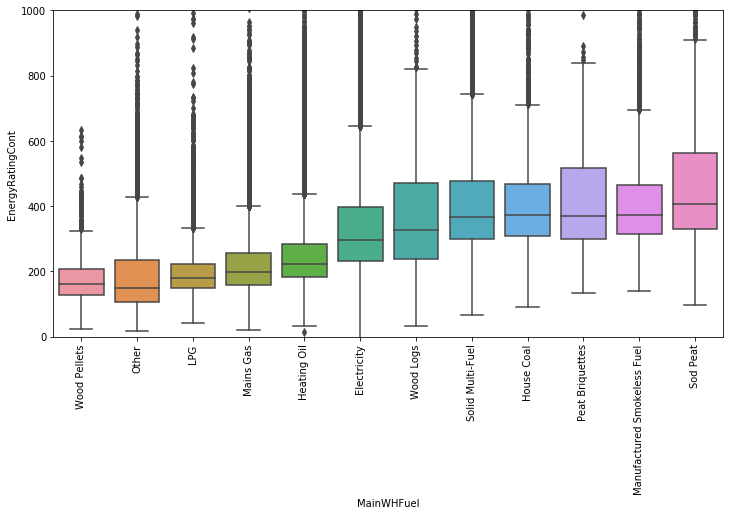

In [38]:
new_MainWHFuel_sort = df.groupby(['MainWHFuel']).mean().to_dict()['EnergyRatingCont']
new_MainWHFuel_sort = sorted(new_MainWHFuel_sort, key=new_MainWHFuel_sort.get)

var = 'MainWHFuel'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EnergyRatingCont", data=df, order=new_MainWHFuel_sort)
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.axis(ymin=0, ymax=1000);

Ok all this looks good. Again, lets transform the categories to numerical values.

In [39]:
df['MainWHFuel'] = df['MainWHFuel'].astype('category').cat.codes

### SharedMPRN

In [40]:
df['SharedMPRN'].unique()
# binary variable

array(['NO', 'YES', nan], dtype=object)

In [41]:
df['SharedMPRN'].isnull().sum()
# no null values

12

In [42]:
df['SharedMPRN'].value_counts()

NO     461398
YES      3104
Name: SharedMPRN, dtype: int64

The value counts shows how very lopsided this variable is. I don't feel this will have much, if any predictive power so I'm going to drop it.

In [43]:
df.drop('SharedMPRN', axis='columns', inplace=True)

### DLobby

In [44]:
df['DLobby'].unique()
# binary variable

array(['NO', 'YES', nan], dtype=object)

In [45]:
df['DLobby'].isnull().sum()

12

In [46]:
df['DLobby'].value_counts()

NO     370781
YES     93721
Name: DLobby, dtype: int64

Again, this is pretty lobsided, so we'll drop it.

In [47]:
df.drop('DLobby', axis='columns', inplace=True)

The remaining categorical variables, listed below, require further analysis but as they all don't stand as as particularly valuable, I'll leave this task for now and focus on what we already have available to us.

In [48]:
# TODO: 
other_cat_variables = ['VentMethod', 'WallStructure', 'SuspWoodFloor', 'PermTest',
'BoilerStat1', 'BoilerStat2', 'OilPumpIn', 'WarmAir', 'Underfloor',
'StorageLoss', 'DeclaredLoss', 'SolarWaterHeating', 'SummerElectricImm',
'Combi', 'KeepHot', 'HWInsulationType', 'PrimaryLoss',
'CylinderThermostat', 'CombiCylinder', 'SolarPumpPower', 'Charging',
'MainSpaceEnergy', 'MassCat', 'PercLivingArea', 'RatingPurpose',
'AssessmentDate', 'FirstEnerTypeDescr', 'SecondEnerTypeDescr',
'ThirdEnerTypeDescr']

To finish up, lets drop the above variables from the data frame.

In [49]:
df.drop(other_cat_variables, axis='columns', inplace=True)

In [50]:
df.shape

(464514, 79)

In [51]:
df.head()

,Year,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,AvgFloorU,AvgWindowU,AvgDoorU,ExposedWallArea,...,RoofAreaRoom,FirstEnerType,ProdFirstEnerDelivered,ProdFirstEnerConvFac,ProdSecondEnerDelivered,ProdSecondEnerConvFac,ProdThirdEnerDelivered,ProdThirdEnerConvFac,PrimaryEnergySecondarySpace,EnergyMainWater
BuildingID,,,,,,,,,,,,,,,,,,,,,
190835,1890.0,F,418.42,52.04,2.10,2.30,0.61,2.71,3.00,32.78,...,18.35,1,0,0,0,0,0,0,0.000,2335.6809
523113,1901.0,G,520.35,147.44,2.01,0.75,0.94,2.63,3.96,211.22,...,0.00,1,0,0,0,0,0,0,7144.838,4470.0759
271393,1968.0,D2,281.33,104.84,0.38,0.13,0.68,2.81,0.00,94.41,...,0.00,1,0,0,0,0,0,0,2127.347,5837.4729
585961,2002.0,C2,188.17,95.31,0.55,0.26,0.34,2.80,3.03,89.50,...,0.00,1,0,0,0,0,0,0,2771.886,3769.6248
624083,2002.0,B3,134.95,283.87,0.55,0.26,0.41,3.10,3.01,254.15,...,0.00,1,0,0,0,0,0,0,0.000,5296.5828


## Correlation Matrix

**Why are correlation matrices useful you ask?**

The correlation is a number between -1 and +1 that measures how close the relationship between two variables is to being linear (i.e., forming a straight line if the two were graphed against each other). Correlation = +1 means variables are perfectly positively correlated (they go up and down in perfect synchronization; e.g., dollars of sales and sales tax); -1 means perfect negative correlation (one goes up and the other goes down; e.g., items sold and inventory); values close to 0 mean either no relation or the relation isn't linear (e.g., annual rainfall and average shoe size). Correlation is independent of scale; measuring one variable in millions and the other in millionths won't affect it.

In [52]:
null_df = df.isnull().sum()
null_df.head()

Year                    0
EnergyRatingCat        12
EnergyRatingCont       12
GroundFloorArea     46172
AvgWallU            46457
dtype: int64

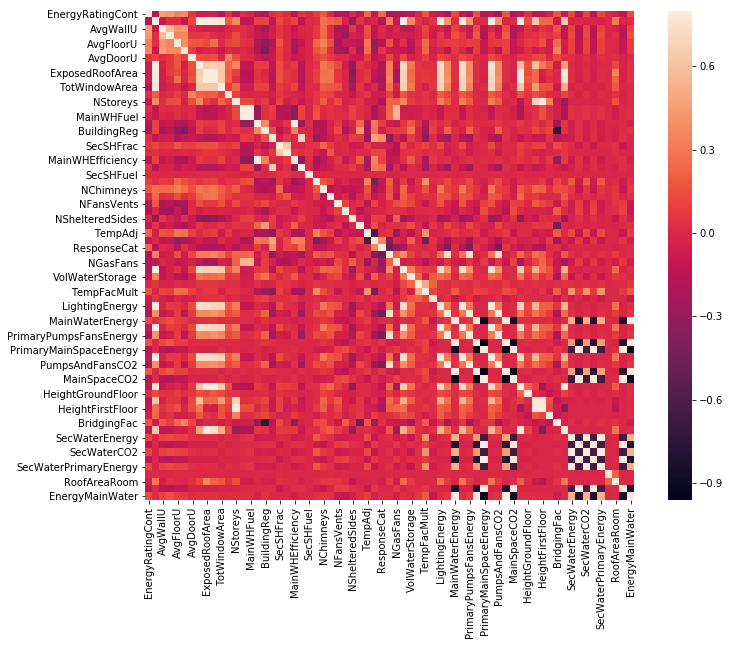

In [53]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [54]:
#df.fillna(df.mean(), inplace=True).head()

In [57]:
# test
test_df = df.dropna(axis=0, how='any')

In [58]:
test_corrmat = test_df.corr()

ValueError: zero-size array to reduction operation minimum which has no identity

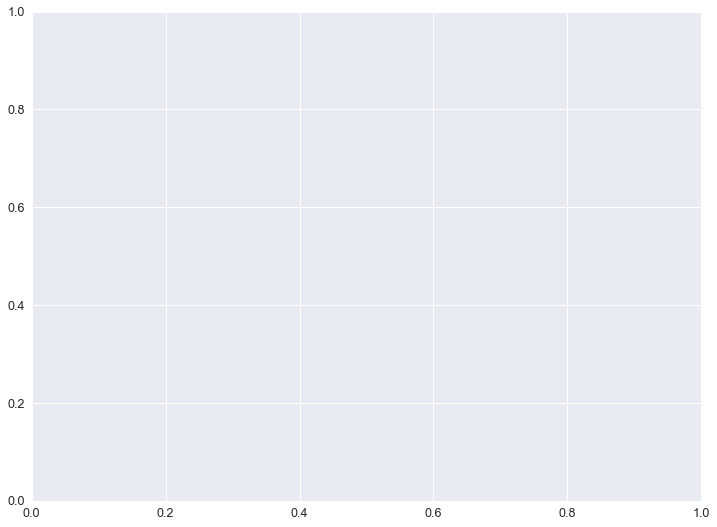

In [59]:
#correlation matrix
k = 15 #number of variables for heatmap
cols = test_corrmat.nlargest(k, 'EnergyRatingCont')['EnergyRatingCont'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [60]:
cm

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,